In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
grouped_data = pd.read_excel('/content/drive/MyDrive/RBAC/Datasets/Cleaned_datasets/grouped_summary_with_OEE.xlsx')

In [4]:
running_machines = pd.read_csv('/content/drive/MyDrive/RBAC/Datasets/Cleaned_datasets/running_machines.csv')

In [7]:
grouped_data.head()

,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,...,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
0,2025-01-01,MAFT2201,Afternoon-2,NaN,0,0.0,0,0,0,0,...,480,0,480,0,NaN,0,NaN,NaN,NaN,NaN
1,2025-01-01,MAFT2201,Day-1,NaN,0,0.0,0,0,0,0,...,480,0,480,0,NaN,0,NaN,NaN,NaN,NaN
2,2025-01-01,MAFT2201,Night-3,NaN,0,0.0,0,0,0,0,...,480,0,480,0,NaN,0,NaN,NaN,NaN,NaN
3,2025-01-01,MAFT2202,Afternoon-2,NaN,0,0.0,0,0,0,0,...,480,0,480,0,NaN,0,NaN,NaN,NaN,NaN
4,2025-01-01,MAFT2202,Day-1,NaN,0,0.0,0,0,0,0,...,480,0,480,0,NaN,0,NaN,NaN,NaN,NaN


In [8]:
grouped_data.shape

(48375, 27)

In [9]:
grouped_data.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
LINE_NAME,0
SHIFT_NAME,0
SIZE_TYPE,28755
DOWNTIME,0
EFFECTIVE_RUNTIME,0
GOOD_PRODUCTION_QTY,0
LUNCH_AND_BREAK,0
MEETING_AND_TRAINING,0
NO_DEMAND,0


In [10]:
grouped_data_2 = grouped_data[grouped_data['SIZE_TYPE'].notna()]

In [11]:
grouped_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19620 entries, 159 to 48367
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     19620 non-null  object 
 1   LINE_NAME                  19620 non-null  object 
 2   SHIFT_NAME                 19620 non-null  object 
 3   SIZE_TYPE                  19620 non-null  object 
 4   DOWNTIME                   19620 non-null  int64  
 5   EFFECTIVE_RUNTIME          19620 non-null  float64
 6   GOOD_PRODUCTION_QTY        19620 non-null  int64  
 7   LUNCH_AND_BREAK            19620 non-null  int64  
 8   MEETING_AND_TRAINING       19620 non-null  int64  
 9   NO_DEMAND                  19620 non-null  int64  
 10  PLANT_AVAILABLE_TIME       19620 non-null  int64  
 11  PLANT_EXPERIMENTATION      19620 non-null  int64  
 12  PRODUCTION_AVAILABLE_TIME  19620 non-null  int64  
 13  REJECT_PRODUCTION_QTY      19620 non-null  int64 

In [12]:
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
grouped_data_2[grouped_data_2['AVAILABILITY'].isna()].describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,22.0,22.0,22.0,22.0,22.0,22.0,22.000000,22.0,22.0,22.0,22.0,22.0000,22.0,22.0,22.0,22.000000,22.0,0.0,22.0,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,224.409091,0.0,0.0,0.0,0.0,308.5000,0.0,0.0,0.0,224.409091,0.0,NaN,0.0,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,0.0,0.0,0.0,163.682521,0.0,0.0,0.0,0.0,174.0894,0.0,0.0,0.0,163.682521,0.0,NaN,0.0,NaN,NaN,NaN,NaN
min,0.0,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.0,0.0,0.0,15.0000,0.0,0.0,0.0,15.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN
25%,0.0,0.0,0.0,0.0,0.0,0.0,97.500000,0.0,0.0,0.0,0.0,217.5000,0.0,0.0,0.0,97.500000,0.0,NaN,0.0,NaN,NaN,NaN,NaN
50%,0.0,0.0,0.0,0.0,0.0,0.0,150.000000,0.0,0.0,0.0,0.0,300.0000,0.0,0.0,0.0,150.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN
75%,0.0,0.0,0.0,0.0,0.0,0.0,360.000000,0.0,0.0,0.0,0.0,412.5000,0.0,0.0,0.0,360.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN
max,0.0,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,0.0,0.0,0.0,650.0000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [13]:
grouped_data_2[grouped_data_2['PRODUCTION_ORDER_RATE'].isna()].describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,66.000000,66.0,66.0,66.0,66.0,66.0,66.000000,66.0,66.000000,66.0,66.0,66.000000,66.0,66.0,66.0,66.000000,66.0,0.0,66.0,0.0,44.0,0.0,0.0
mean,202.954545,0.0,0.0,0.0,0.0,0.0,293.969697,0.0,202.954545,0.0,0.0,124.954545,0.0,0.0,0.0,293.969697,0.0,NaN,0.0,NaN,0.0,NaN,NaN
std,207.745364,0.0,0.0,0.0,0.0,0.0,173.072414,0.0,207.745364,0.0,0.0,182.661472,0.0,0.0,0.0,173.072414,0.0,NaN,0.0,NaN,0.0,NaN,NaN
min,0.000000,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
25%,0.000000,0.0,0.0,0.0,0.0,0.0,120.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,120.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
50%,100.000000,0.0,0.0,0.0,0.0,0.0,283.500000,0.0,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,283.500000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
75%,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,269.250000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
max,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,650.000000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN


In [14]:
grouped_data_2[grouped_data_2['PERFORMANCE'].isna() & grouped_data_2['QUALITY'].isna() & grouped_data_2['PRODUCTION_ORDER_RATE'].isna()].describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,66.000000,66.0,66.0,66.0,66.0,66.0,66.000000,66.0,66.000000,66.0,66.0,66.000000,66.0,66.0,66.0,66.000000,66.0,0.0,66.0,0.0,44.0,0.0,0.0
mean,202.954545,0.0,0.0,0.0,0.0,0.0,293.969697,0.0,202.954545,0.0,0.0,124.954545,0.0,0.0,0.0,293.969697,0.0,NaN,0.0,NaN,0.0,NaN,NaN
std,207.745364,0.0,0.0,0.0,0.0,0.0,173.072414,0.0,207.745364,0.0,0.0,182.661472,0.0,0.0,0.0,173.072414,0.0,NaN,0.0,NaN,0.0,NaN,NaN
min,0.000000,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
25%,0.000000,0.0,0.0,0.0,0.0,0.0,120.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,120.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
50%,100.000000,0.0,0.0,0.0,0.0,0.0,283.500000,0.0,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,283.500000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
75%,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,269.250000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
max,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,650.000000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN


Giá trị trống trong PERFORMANCE và QUALITY là do RUNTIME = 0, GOOD_PRODUCTION_QTY và REJECT_PRODUCTION_QTY = 0



In [15]:
group_data_3 = grouped_data_2[grouped_data_2['PERFORMANCE'].isna() & grouped_data_2['QUALITY'].isna() & grouped_data_2['PRODUCTION_ORDER_RATE'].isna()]

In [16]:
group_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1854 to 48183
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     66 non-null     object 
 1   LINE_NAME                  66 non-null     object 
 2   SHIFT_NAME                 66 non-null     object 
 3   SIZE_TYPE                  66 non-null     object 
 4   DOWNTIME                   66 non-null     int64  
 5   EFFECTIVE_RUNTIME          66 non-null     float64
 6   GOOD_PRODUCTION_QTY        66 non-null     int64  
 7   LUNCH_AND_BREAK            66 non-null     int64  
 8   MEETING_AND_TRAINING       66 non-null     int64  
 9   NO_DEMAND                  66 non-null     int64  
 10  PLANT_AVAILABLE_TIME       66 non-null     int64  
 11  PLANT_EXPERIMENTATION      66 non-null     int64  
 12  PRODUCTION_AVAILABLE_TIME  66 non-null     int64  
 13  REJECT_PRODUCTION_QTY      66 non-null     int64  


In [17]:
group_data_4 = grouped_data_2[grouped_data_2['PERFORMANCE'].notna() | grouped_data_2['QUALITY'].notna() | grouped_data_2['PRODUCTION_ORDER_RATE'].notna()]

In [18]:
group_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19554 entries, 159 to 48367
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     19554 non-null  object 
 1   LINE_NAME                  19554 non-null  object 
 2   SHIFT_NAME                 19554 non-null  object 
 3   SIZE_TYPE                  19554 non-null  object 
 4   DOWNTIME                   19554 non-null  int64  
 5   EFFECTIVE_RUNTIME          19554 non-null  float64
 6   GOOD_PRODUCTION_QTY        19554 non-null  int64  
 7   LUNCH_AND_BREAK            19554 non-null  int64  
 8   MEETING_AND_TRAINING       19554 non-null  int64  
 9   NO_DEMAND                  19554 non-null  int64  
 10  PLANT_AVAILABLE_TIME       19554 non-null  int64  
 11  PLANT_EXPERIMENTATION      19554 non-null  int64  
 12  PRODUCTION_AVAILABLE_TIME  19554 non-null  int64  
 13  REJECT_PRODUCTION_QTY      19554 non-null  int64 

# Group data 4

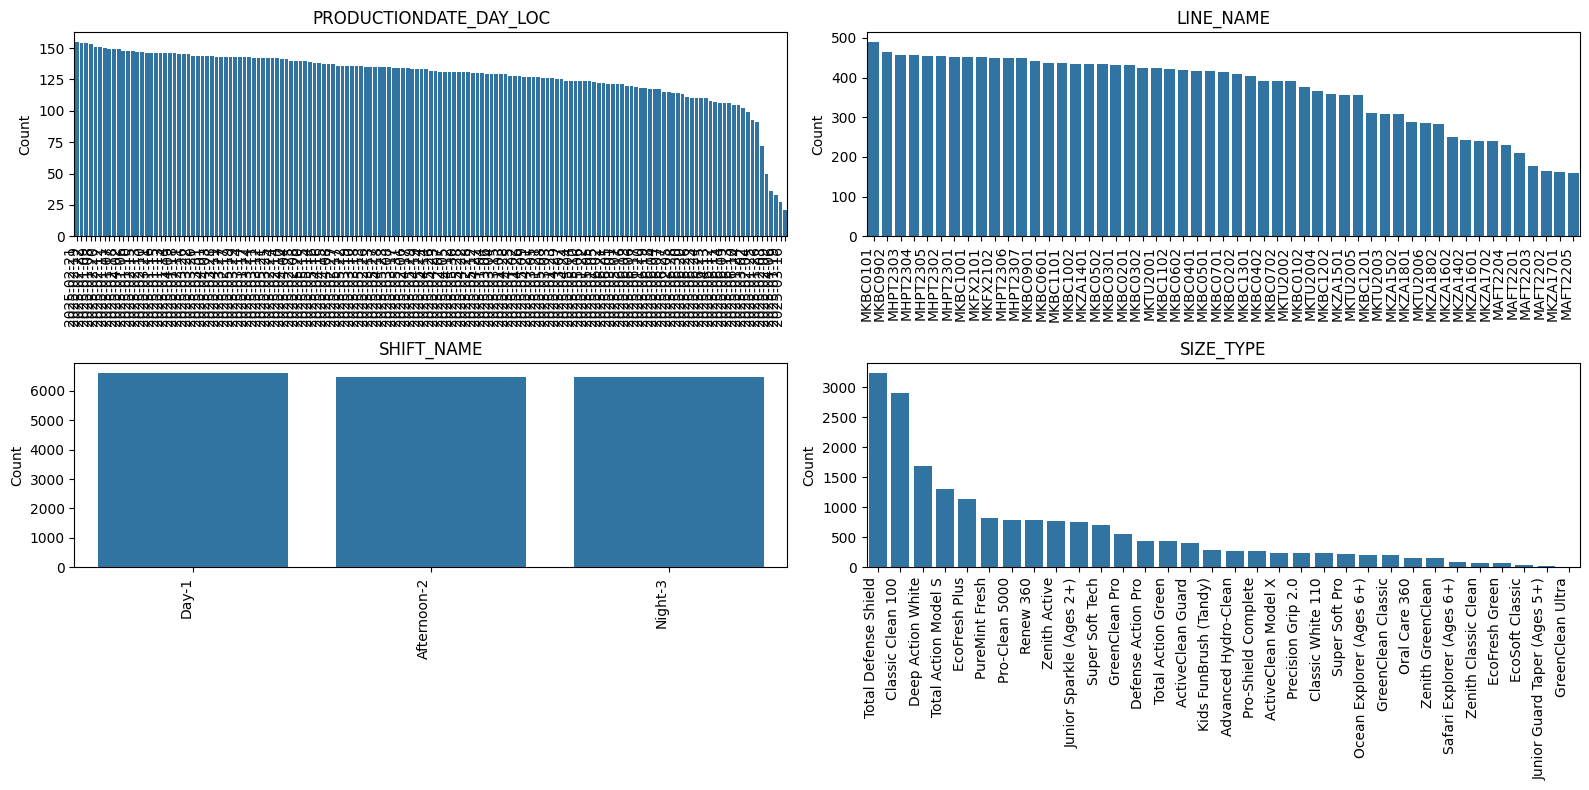

In [19]:
cat_cols = group_data_4.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=group_data_4, x=col, order=group_data_4[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

,0
DOWNTIME,"Axes(0.125,0.77;0.168478x0.11)"
EFFECTIVE_RUNTIME,"Axes(0.327174,0.77;0.168478x0.11)"
GOOD_PRODUCTION_QTY,"Axes(0.529348,0.77;0.168478x0.11)"
LUNCH_AND_BREAK,"Axes(0.731522,0.77;0.168478x0.11)"
MEETING_AND_TRAINING,"Axes(0.125,0.638;0.168478x0.11)"
NO_DEMAND,"Axes(0.327174,0.638;0.168478x0.11)"
PLANT_AVAILABLE_TIME,"Axes(0.529348,0.638;0.168478x0.11)"
PLANT_EXPERIMENTATION,"Axes(0.731522,0.638;0.168478x0.11)"
PRODUCTION_AVAILABLE_TIME,"Axes(0.125,0.506;0.168478x0.11)"
REJECT_PRODUCTION_QTY,"Axes(0.327174,0.506;0.168478x0.11)"


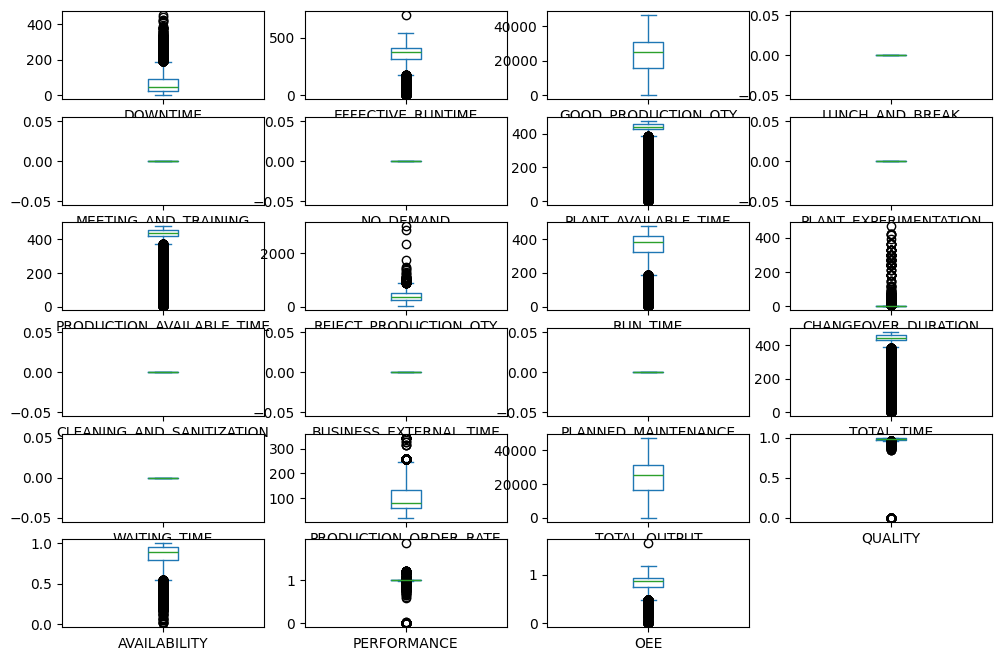

In [20]:
group_data_4.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(6,4), figsize=(12, 8), sharex=False)


In [21]:
cols = ['EFFECTIVE_RUNTIME', 'RUN_TIME', 'PRODUCTION_ORDER_RATE', 'QUALITY', 'AVAILABILITY', 'PERFORMANCE', 'OEE']

for col in cols:
    Q1 = group_data_4[col].quantile(0.25)
    Q3 = group_data_4[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = group_data_4[(group_data_4[col] < lower) | (group_data_4[col] > upper)]
    print(f"\n📊 {col}")
    print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(group_data_4)*100:.2f}%)")



📊 EFFECTIVE_RUNTIME
  Q1 = 316.36, Q3 = 411.36, IQR = 95.00
  Lower: 173.87, upper: 553.85
  Outliers: 932 (4.77%)

📊 RUN_TIME
  Q1 = 323.00, Q3 = 414.00, IQR = 91.00
  Lower: 186.50, upper: 550.50
  Outliers: 1050 (5.37%)

📊 PRODUCTION_ORDER_RATE
  Q1 = 60.00, Q3 = 134.00, IQR = 74.00
  Lower: -51.00, upper: 245.00
  Outliers: 417 (2.13%)

📊 QUALITY
  Q1 = 0.98, Q3 = 0.99, IQR = 0.01
  Lower: 0.95, upper: 1.01
  Outliers: 1628 (8.33%)

📊 AVAILABILITY
  Q1 = 0.79, Q3 = 0.95, IQR = 0.16
  Lower: 0.55, upper: 1.19
  Outliers: 1066 (5.45%)

📊 PERFORMANCE
  Q1 = 0.99, Q3 = 1.00, IQR = 0.01
  Lower: 0.98, upper: 1.01
  Outliers: 3238 (16.56%)

📊 OEE
  Q1 = 0.75, Q3 = 0.93, IQR = 0.18
  Lower: 0.49, upper: 1.19
  Outliers: 963 (4.92%)


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

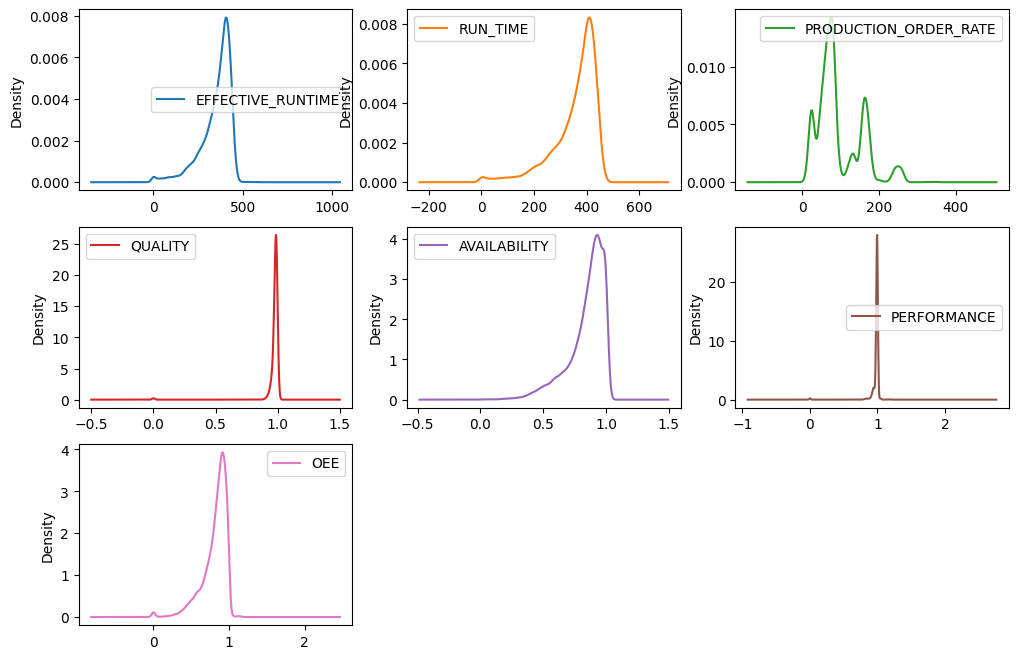

In [22]:
group_data_4[cols].plot(kind='density', subplots=True, layout=(3,3), figsize=(12, 8), sharex=False)


## Quality

In [23]:
Q1 = group_data_4['QUALITY'].quantile(0.25)
Q3 = group_data_4['QUALITY'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = group_data_4[(group_data_4['QUALITY'] < lower) | (group_data_4['QUALITY'] > upper)]
print(f"\n📊 {'QUALITY'}")
print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
print(f"  Outliers: {len(outliers)} ({len(outliers)/len(group_data_4)*100:.2f}%)")


📊 QUALITY
  Q1 = 0.98, Q3 = 0.99, IQR = 0.01
  Lower: 0.95, upper: 1.01
  Outliers: 1628 (8.33%)


In [24]:
outliers[outliers['QUALITY'] < lower]

,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
159,2025-01-02,MAFT2201,Afternoon-2,Renew 360,79,316.000000,7584,0,0,0,412,0,412,469,333,0,0,0,0,412,0,24.00,8053,0.941761,0.808252,0.948949,0.722321
161,2025-01-02,MAFT2201,Day-1,Renew 360,122,272.000000,6528,0,0,0,418,0,418,677,296,0,0,0,0,418,0,24.00,7205,0.906037,0.708134,0.918919,0.589575
163,2025-01-02,MAFT2201,Night-3,Renew 360,65,312.000000,7488,0,0,0,395,0,395,587,330,0,0,0,0,395,0,24.00,8075,0.927307,0.835443,0.945455,0.732455
167,2025-01-02,MAFT2202,Day-1,Renew 360,74,283.750000,6810,0,0,0,418,0,388,653,314,30,0,0,0,418,0,48.00,7463,0.912502,0.809278,0.903662,0.667326
169,2025-01-02,MAFT2202,Night-3,Renew 360,52,324.000000,7776,0,0,0,395,0,395,500,343,0,0,0,0,395,0,24.00,8276,0.939584,0.868354,0.944606,0.770697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48310,2025-06-30,MKTU2003,Afternoon-2,EcoFresh Green,287,123.434046,6650,0,0,0,440,0,440,541,153,0,0,0,0,440,0,27.14,7191,0.924767,0.347727,0.806758,0.259427
48312,2025-06-30,MKTU2003,Day-1,EcoFresh Green,194,35.003685,4250,0,0,0,470,0,230,301,36,240,0,0,0,470,0,27.14,4551,0.933861,0.156522,0.972325,0.142124
48324,2025-06-30,MKTU2005,Night-3,GreenClean Ultra,30,370.522849,9000,0,0,0,422,0,422,436,392,0,0,0,0,422,0,24.29,9436,0.953794,0.928910,0.945211,0.837447
48330,2025-06-30,MKTU2006,Night-3,GreenClean Ultra,44,333.470564,8100,0,0,0,412,0,412,476,368,0,0,0,0,412,0,24.29,8576,0.944496,0.893204,0.906170,0.764470


In [25]:
outliers['QUALITY'].sort_values().unique()

array([0.        , 0.84295033, 0.84632517, ..., 0.95400954, 0.95401641,
       0.95406764])

In [26]:
no_good_product = group_data_4[group_data_4['QUALITY'] == 0]

In [27]:
no_good_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 329 to 48207
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     116 non-null    object 
 1   LINE_NAME                  116 non-null    object 
 2   SHIFT_NAME                 116 non-null    object 
 3   SIZE_TYPE                  116 non-null    object 
 4   DOWNTIME                   116 non-null    int64  
 5   EFFECTIVE_RUNTIME          116 non-null    float64
 6   GOOD_PRODUCTION_QTY        116 non-null    int64  
 7   LUNCH_AND_BREAK            116 non-null    int64  
 8   MEETING_AND_TRAINING       116 non-null    int64  
 9   NO_DEMAND                  116 non-null    int64  
 10  PLANT_AVAILABLE_TIME       116 non-null    int64  
 11  PLANT_EXPERIMENTATION      116 non-null    int64  
 12  PRODUCTION_AVAILABLE_TIME  116 non-null    int64  
 13  REJECT_PRODUCTION_QTY      116 non-null    int64  


## Performance

In [28]:
Q1 = group_data_4['PERFORMANCE'].quantile(0.25)
Q3 = group_data_4['PERFORMANCE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = group_data_4[(group_data_4['PERFORMANCE'] < lower) | (group_data_4['PERFORMANCE'] > upper)]
print(f"\n📊 {'PERFORMANCE'}")
print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
print(f"  Outliers: {len(outliers)} ({len(outliers)/len(group_data_4)*100:.2f}%)")


📊 PERFORMANCE
  Q1 = 0.99, Q3 = 1.00, IQR = 0.01
  Lower: 0.98, upper: 1.01
  Outliers: 3238 (16.56%)


In [29]:
vals = outliers.loc[outliers['PERFORMANCE'] < lower, 'PERFORMANCE'].sort_values().unique()
print(vals.tolist())

[0.0, 0.01166861144, 0.01228501229, 0.01267427123, 0.01492537313, 0.03684598379, 0.04, 0.5714285714285714, 0.6, 0.6401463191333334, 0.6497725794736842, 0.6808736403041825, 0.6935714595294118, 0.6936656013192612, 0.7002801120714286, 0.7286927437262358, 0.7323757323717949, 0.7441207440000001, 0.7462686564285714, 0.7462686566666666, 0.7515689, 0.7547654607843137, 0.7604540207084468, 0.7607340660273973, 0.7615057662650602, 0.7811219225895316, 0.7829933836236933, 0.7875007876068376, 0.7900622325520833, 0.792141951875, 0.7925295110787173, 0.7925576898666666, 0.7928597318181818, 0.7931479396946565, 0.7933458506437768, 0.7944147485411142, 0.7947412212624585, 0.7948468488304095, 0.7992199613698631, 0.8067226890756303, 0.8067584686274509, 0.8075328963144963, 0.8077313559105431, 0.8083676596385542, 0.8088860434513274, 0.8089808663911846, 0.8090237264, 0.8103202385057472, 0.8103202385833334, 0.8103341436293435, 0.810761829972752, 0.8110883146919432, 0.8112983302325582, 0.8114530807511736, 0.812435

In [30]:
poor_performance = group_data_4[group_data_4['PERFORMANCE'] < 0.5]

In [32]:
poor_performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 329 to 48207
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     122 non-null    object 
 1   LINE_NAME                  122 non-null    object 
 2   SHIFT_NAME                 122 non-null    object 
 3   SIZE_TYPE                  122 non-null    object 
 4   DOWNTIME                   122 non-null    int64  
 5   EFFECTIVE_RUNTIME          122 non-null    float64
 6   GOOD_PRODUCTION_QTY        122 non-null    int64  
 7   LUNCH_AND_BREAK            122 non-null    int64  
 8   MEETING_AND_TRAINING       122 non-null    int64  
 9   NO_DEMAND                  122 non-null    int64  
 10  PLANT_AVAILABLE_TIME       122 non-null    int64  
 11  PLANT_EXPERIMENTATION      122 non-null    int64  
 12  PRODUCTION_AVAILABLE_TIME  122 non-null    int64  
 13  REJECT_PRODUCTION_QTY      122 non-null    int64  


In [33]:
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 335 to 47730
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     318 non-null    object 
 1   LINE_NAME                  318 non-null    object 
 2   SHIFT_NAME                 318 non-null    object 
 3   SIZE_TYPE                  318 non-null    object 
 4   DOWNTIME                   318 non-null    int64  
 5   EFFECTIVE_RUNTIME          318 non-null    float64
 6   GOOD_PRODUCTION_QTY        318 non-null    int64  
 7   LUNCH_AND_BREAK            318 non-null    int64  
 8   MEETING_AND_TRAINING       318 non-null    int64  
 9   NO_DEMAND                  318 non-null    int64  
 10  PLANT_AVAILABLE_TIME       318 non-null    int64  
 11  PLANT_EXPERIMENTATION      318 non-null    int64  
 12  PRODUCTION_AVAILABLE_TIME  318 non-null    int64  
 13  REJECT_PRODUCTION_QTY      318 non-null    int64  


### Poor performance (INSIGHTS)

In [36]:
poor_performance.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,122.000000,122.000000,122.000000,122.0,122.0,122.0,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.0,122.0,122.0,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2.418033,0.001052,162.344262,0.0,0.0,0.0,24.229508,0.0,5.631148,224.614754,3.213115,9.032787,0.0,0.0,0.0,24.229508,0.0,67.575738,386.959016,0.045909,0.966195,0.001052,0.000681
std,14.690662,0.005373,716.766243,0.0,0.0,0.0,83.176382,0.0,16.942392,350.617294,4.491000,42.196693,0.0,0.0,0.0,83.176382,0.0,18.220310,801.859063,0.202952,0.167752,0.005373,0.004517
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,20.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,20.000000,20.000000,0.000000,0.009804,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,2.000000,130.000000,2.000000,0.000000,0.0,0.0,0.0,2.000000,0.0,63.160000,130.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,2.000000,190.000000,2.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,73.005000,200.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,3.000000,200.000000,3.000000,0.000000,0.0,0.0,0.0,3.000000,0.0,79.137500,200.000000,0.000000,1.000000,0.000000,0.000000
max,116.000000,0.040000,3301.000000,0.0,0.0,0.0,473.000000,0.0,146.000000,3000.000000,38.000000,270.000000,0.0,0.0,0.0,473.000000,0.0,86.000000,3800.000000,0.993081,1.000000,0.040000,0.036842


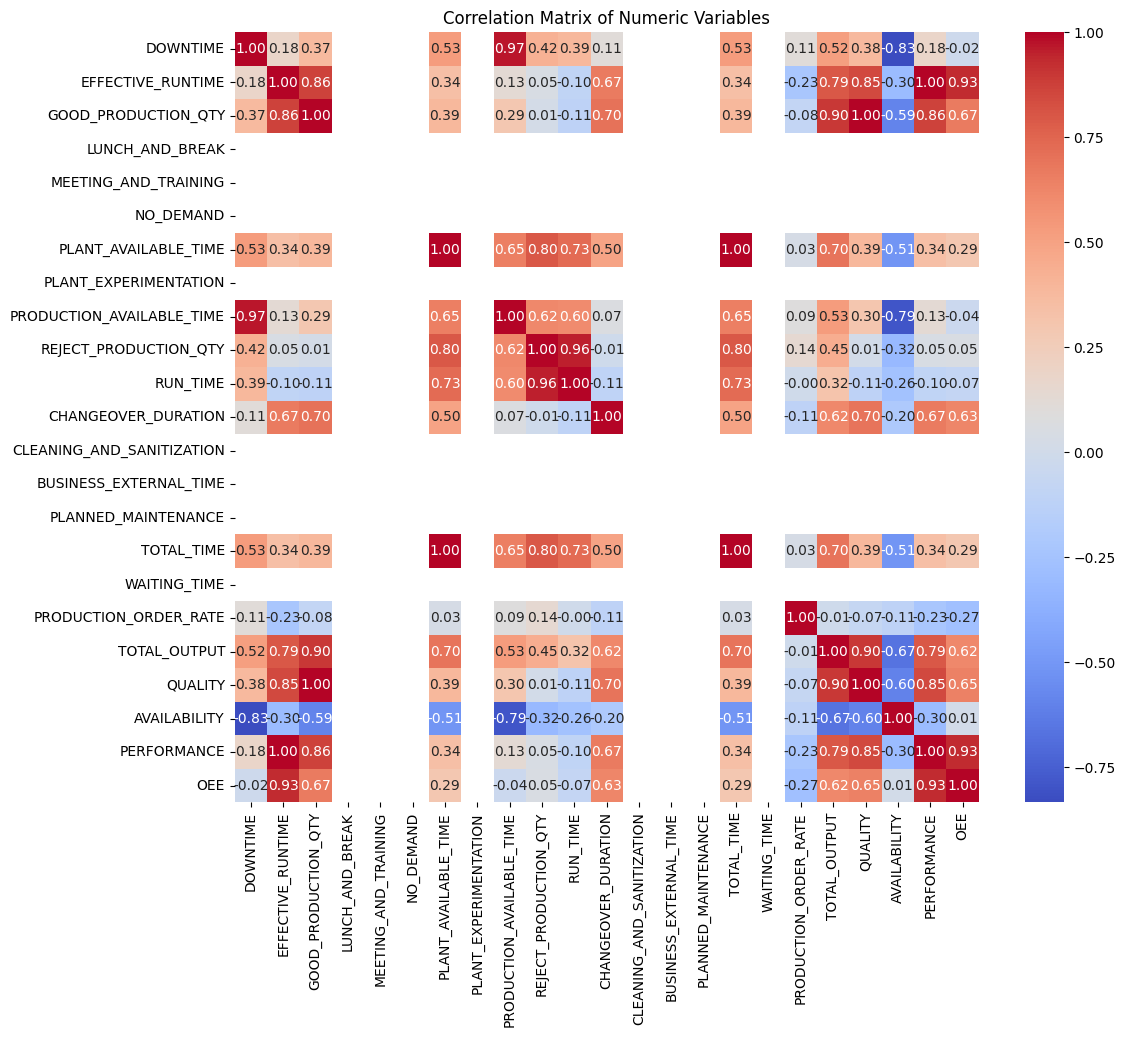

In [98]:
corr_matrix = poor_performance.select_dtypes('number').corr()

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

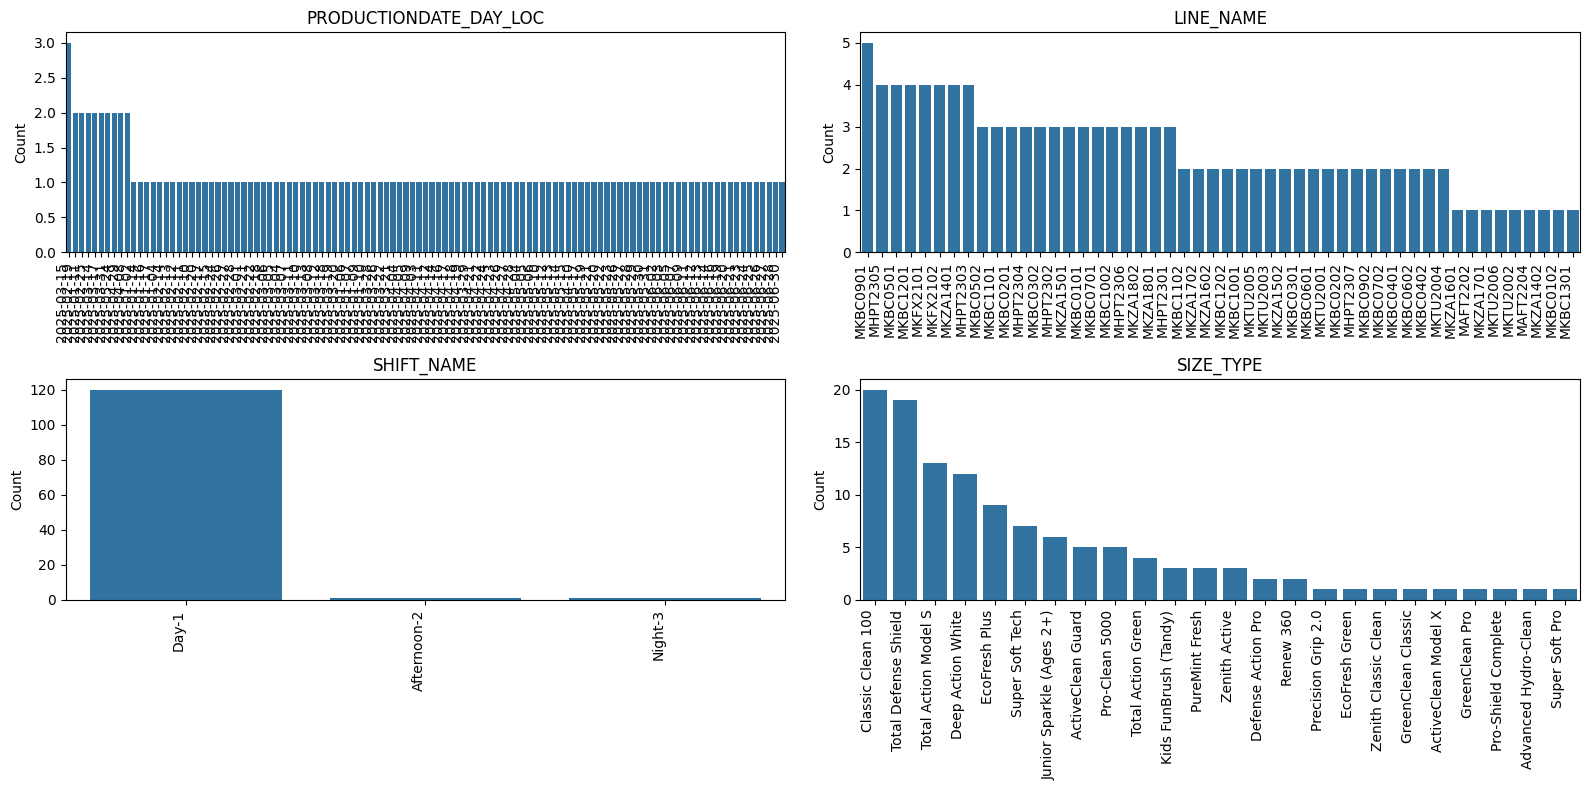

In [37]:
cat_cols = poor_performance.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=poor_performance, x=col, order=poor_performance[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Trong số các máy có chỉ số PERFORMANCE thấp (<0.5), hầu hết các máy được ghi nhận trong ca sáng

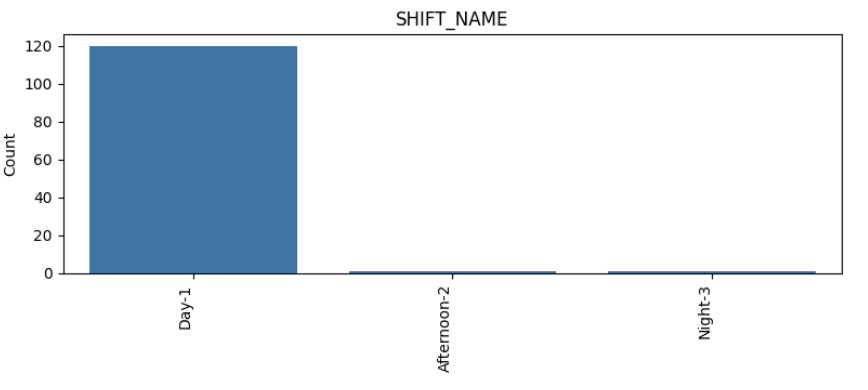

In [38]:
running_machines['SHIFT_NAME'].value_counts(normalize = True)

,proportion
SHIFT_NAME,
Day-1,0.337233
Night-3,0.333515
Afternoon-2,0.329252


## Availability

In [39]:
Q1 = group_data_4['AVAILABILITY'].quantile(0.25)
Q3 = group_data_4['AVAILABILITY'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = group_data_4[(group_data_4['AVAILABILITY'] < lower) | (group_data_4['AVAILABILITY'] > upper)]
print(f"\n📊 {'AVAILABILITY'}")
print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
print(f"  Outliers: {len(outliers)} ({len(outliers)/len(group_data_4)*100:.2f}%)")


📊 AVAILABILITY
  Q1 = 0.79, Q3 = 0.95, IQR = 0.16
  Lower: 0.55, upper: 1.19
  Outliers: 1066 (5.45%)


In [40]:
group_data_4['AVAILABILITY'].describe()

,AVAILABILITY
count,19554.000000
mean,0.846659
std,0.146135
min,0.009804
25%,0.788516
50%,0.889148
75%,0.949561
max,1.000000


In [41]:
vals = outliers.loc[outliers['AVAILABILITY'] < lower, 'AVAILABILITY'].sort_values()
print(vals.tolist())

[0.00980392156862745, 0.01538461538461539, 0.01886792452830189, 0.03009259259259259, 0.03009259259259259, 0.04545454545454546, 0.05607476635514019, 0.06699751861042183, 0.06766917293233082, 0.06896551724137931, 0.08125, 0.1051502145922747, 0.1069868995633188, 0.1122994652406417, 0.1206496519721578, 0.1255605381165919, 0.1304347826086956, 0.1417721518987342, 0.1521739130434783, 0.1565217391304348, 0.1576470588235294, 0.1629464285714286, 0.1666666666666667, 0.1682242990654206, 0.1695652173913043, 0.1724137931034483, 0.1754385964912281, 0.1764705882352941, 0.1764705882352941, 0.1782178217821782, 0.1790697674418605, 0.1828703703703704, 0.1900647948164147, 0.1901408450704225, 0.1927194860813705, 0.1940639269406393, 0.2024390243902439, 0.2051282051282051, 0.2053571428571428, 0.2054794520547945, 0.2086092715231788, 0.2106481481481481, 0.2134570765661253, 0.2135922330097087, 0.2137767220902613, 0.2152466367713005, 0.2227272727272727, 0.2232558139534884, 0.2241379310344828, 0.2255813953488372, 

In [42]:
outliers

,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
175,2025-01-02,MAFT2203,Night-3,Renew 360,198,186.833333,7784,0,0,0,397,0,397,275,199,0,0,0,0,397,0,24.00,8059,0.965877,0.501259,0.938861,0.454554
236,2025-01-02,MKBC0102,Night-3,Pro-Shield Complete,223,174.447174,14200,0,0,0,422,0,399,557,176,23,0,0,0,422,0,162.80,14757,0.962255,0.441103,0.991177,0.420709
273,2025-01-02,MKBC0501,Afternoon-2,GreenClean Pro,216,207.133059,15100,0,0,0,430,0,428,664,212,2,0,0,0,430,0,145.80,15764,0.957879,0.495327,0.977043,0.463571
275,2025-01-02,MKBC0501,Day-1,GreenClean Pro,186,88.477366,6450,0,0,0,280,0,279,436,93,1,0,0,0,280,0,145.80,6886,0.936683,0.333333,0.951370,0.297044
277,2025-01-02,MKBC0501,Night-3,GreenClean Pro,218,183.813443,13400,0,0,0,405,0,404,699,186,1,0,0,0,405,0,145.80,14099,0.950422,0.460396,0.988244,0.432427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47730,2025-06-28,MKBC0101,Afternoon-2,Safari Explorer (Ages 6+),57,38.372093,6600,0,0,0,100,0,95,60,38,5,0,0,0,100,0,86.00,6660,0.990991,0.400000,1.009792,0.400278
47881,2025-06-28,MKTU2004,Day-1,Total Action Green,220,208.000000,5200,0,0,0,431,0,430,92,210,1,0,0,0,431,0,50.00,5292,0.982615,0.488372,0.990476,0.475312
48256,2025-06-30,MKBC1002,Afternoon-2,Classic Clean 100,264,191.634981,15120,0,0,0,459,0,459,299,195,0,0,0,0,459,0,78.90,15419,0.980608,0.424837,0.982743,0.409409
48310,2025-06-30,MKTU2003,Afternoon-2,EcoFresh Green,287,123.434046,6650,0,0,0,440,0,440,541,153,0,0,0,0,440,0,27.14,7191,0.924767,0.347727,0.806758,0.259427


In [43]:
outliers.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,1066.000000,1066.000000,1066.000000,1066.0,1066.0,1066.0,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.0,1066.0,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,221.231707,172.822926,11446.591932,0.0,0.0,0.0,411.232645,0.0,397.994371,401.064728,176.762664,11.867730,0.0,0.0,0.0,411.232645,0.0,78.336501,11847.656660,0.960870,0.438608,0.971148,0.412730
std,59.022919,56.268074,3811.005882,0.0,0.0,0.0,74.945553,0.0,89.216517,195.408503,56.282595,48.088049,0.0,0.0,0.0,74.945553,0.0,40.653179,3818.859418,0.047214,0.096860,0.075195,0.099176
min,5.000000,0.000000,0.000000,0.0,0.0,0.0,44.000000,0.0,6.000000,15.000000,1.000000,0.000000,0.0,0.0,0.0,44.000000,0.0,20.000000,1500.000000,0.000000,0.009804,0.000000,0.000000
25%,201.250000,153.307985,7850.000000,0.0,0.0,0.0,416.250000,0.0,411.000000,261.000000,158.250000,0.000000,0.0,0.0,0.0,416.250000,0.0,63.800000,8249.500000,0.952047,0.399555,0.975200,0.369951
50%,222.000000,189.396474,12000.000000,0.0,0.0,0.0,430.000000,0.0,429.000000,391.000000,195.000000,0.000000,0.0,0.0,0.0,430.000000,0.0,67.000000,12547.500000,0.966982,0.465091,0.987709,0.439162
75%,250.000000,213.554915,14400.000000,0.0,0.0,0.0,445.000000,0.0,443.000000,528.000000,217.000000,1.000000,0.0,0.0,0.0,445.000000,0.0,81.400000,14796.500000,0.978378,0.509217,0.992774,0.485445
max,448.000000,252.184927,21000.000000,0.0,0.0,0.0,476.000000,0.0,473.000000,2350.000000,253.000000,360.000000,0.0,0.0,0.0,476.000000,0.0,244.200000,21496.000000,0.996945,0.546729,1.120690,0.534758


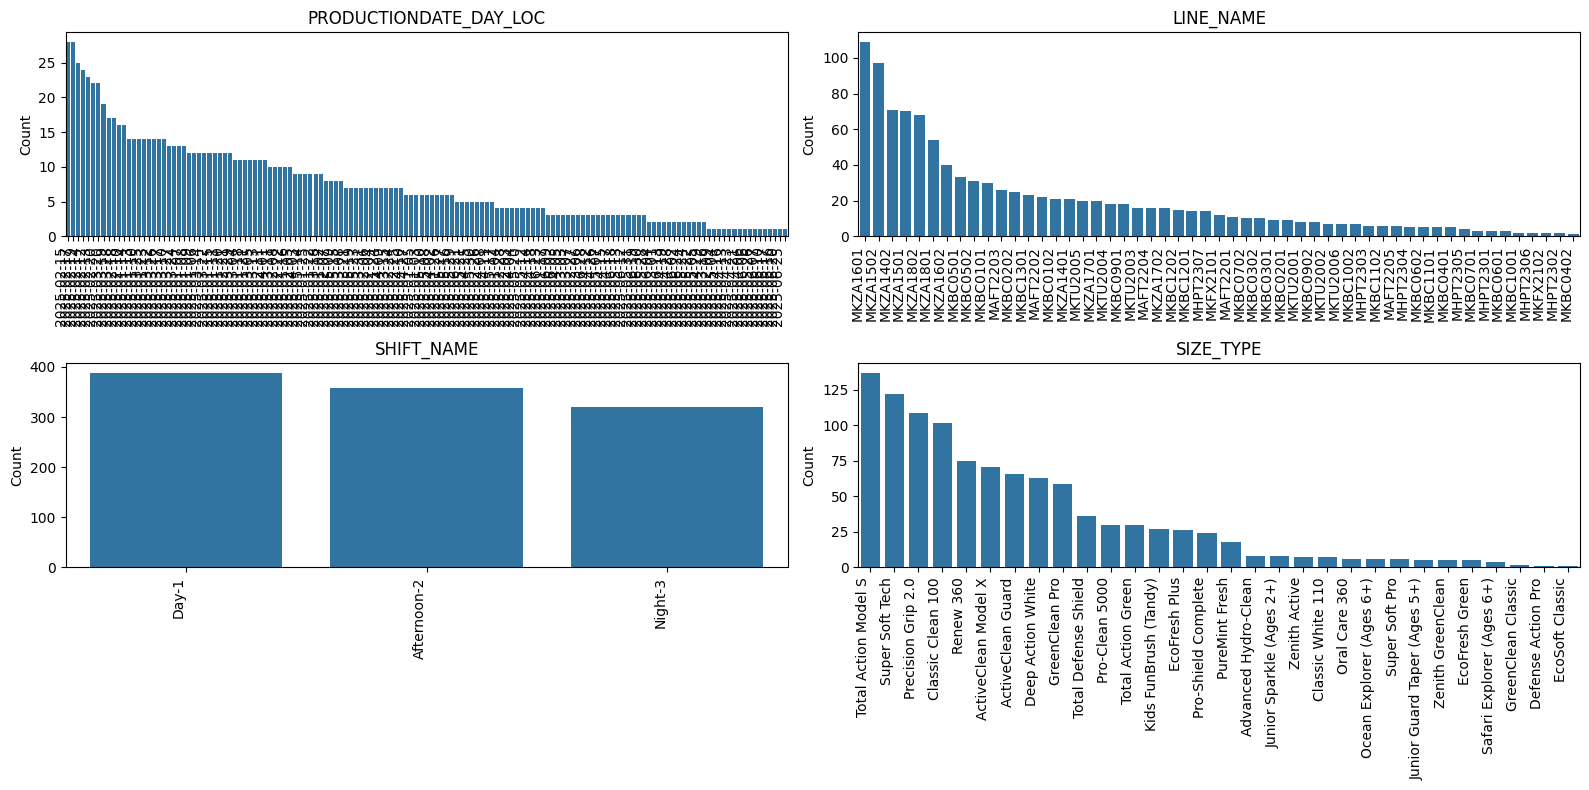

In [44]:
cat_cols = outliers.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=outliers, x=col, order=outliers[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

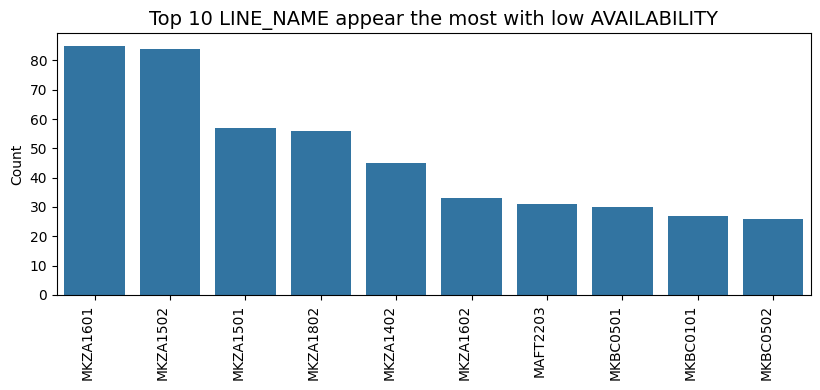

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['LINE_NAME']

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    # Lấy top 10 nhóm có tần suất cao nhất
    top_categories = outliers[col].value_counts().nlargest(10).index

    sns.countplot(
        data=outliers[outliers[col].isin(top_categories)],
        x=col,
        order=top_categories
    )

    plt.title(f'Top 10 {col} appear the most with low AVAILABILITY', fontsize=14)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### PHÂN TÍCH CÁC LINE_NAME ĐẶC BIỆT (INSIGHTS)

In [45]:
line_names = outliers[outliers['LINE_NAME'].isin(['MKZA1601','MKZA1502'])]

In [46]:
pd.set_option('display.max_columns', None)  # hiển thị tất cả các cột
pd.set_option('display.max_rows', None)     # hiển thị tất cả các hàng
pd.set_option('display.width', None)        # không giới hạn độ rộng dòng
pd.set_option('display.max_colwidth', None) # không cắt ngắn nội dung cột
line_names.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,206.000000,206.000000,206.000000,206.0,206.0,206.0,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.0,206.0,206.0,206.000000,206.0,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,239.233010,183.970823,12486.805825,0.0,0.0,0.0,430.990291,0.0,426.111650,428.509709,186.878641,4.864078,0.0,0.0,0.0,430.990291,0.0,71.881845,12915.315534,0.965401,0.435195,0.983202,0.414030
std,39.798935,44.092654,2516.462944,0.0,0.0,0.0,42.465135,0.0,51.803495,168.674596,44.132614,32.832033,0.0,0.0,0.0,42.465135,0.0,17.454484,2525.594692,0.015718,0.084105,0.013246,0.084041
min,72.000000,17.910448,4500.000000,0.0,0.0,0.0,177.000000,0.0,133.000000,84.000000,18.000000,0.000000,0.0,0.0,0.0,177.000000,0.0,67.000000,4935.000000,0.906475,0.068966,0.911805,0.062574
25%,217.000000,169.029851,11325.000000,0.0,0.0,0.0,428.000000,0.0,428.000000,298.250000,171.250000,0.000000,0.0,0.0,0.0,428.000000,0.0,67.000000,11758.750000,0.955313,0.398803,0.979101,0.374913
50%,238.000000,191.417910,12825.000000,0.0,0.0,0.0,442.000000,0.0,437.500000,436.000000,194.000000,0.000000,0.0,0.0,0.0,442.000000,0.0,67.000000,13171.000000,0.966742,0.449547,0.987815,0.423957
75%,263.000000,212.599414,14250.000000,0.0,0.0,0.0,455.000000,0.0,446.000000,554.500000,215.750000,0.000000,0.0,0.0,0.0,455.000000,0.0,67.000000,14711.750000,0.977287,0.495978,0.990680,0.478813
max,409.000000,249.253731,16700.000000,0.0,0.0,0.0,473.000000,0.0,473.000000,965.000000,252.000000,330.000000,0.0,0.0,0.0,473.000000,0.0,134.220000,17333.000000,0.994078,0.546638,1.002450,0.529265


In [47]:
numeric_cols = line_names.select_dtypes(include=np.number)
non_zero_cols = numeric_cols.loc[:, (numeric_cols != 0).any(axis=0)]

non_numeric_cols = line_names.select_dtypes(exclude=np.number)
line_names = pd.concat([non_numeric_cols, non_zero_cols], axis=1)


In [48]:
line_names.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 1568 to 46566
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     206 non-null    object 
 1   LINE_NAME                  206 non-null    object 
 2   SHIFT_NAME                 206 non-null    object 
 3   SIZE_TYPE                  206 non-null    object 
 4   DOWNTIME                   206 non-null    int64  
 5   EFFECTIVE_RUNTIME          206 non-null    float64
 6   GOOD_PRODUCTION_QTY        206 non-null    int64  
 7   PLANT_AVAILABLE_TIME       206 non-null    int64  
 8   PRODUCTION_AVAILABLE_TIME  206 non-null    int64  
 9   REJECT_PRODUCTION_QTY      206 non-null    int64  
 10  RUN_TIME                   206 non-null    int64  
 11  CHANGEOVER_DURATION        206 non-null    int64  
 12  TOTAL_TIME                 206 non-null    int64  
 13  PRODUCTION_ORDER_RATE      206 non-null    float64

In [49]:
suspects = ['MKZA1601', 'MKZA1502']

# chia nhóm
suspect_data = group_data_4[group_data_4['LINE_NAME'].isin(suspects)]
normal_data = group_data_4[~group_data_4['LINE_NAME'].isin(suspects)]

# so sánh mô tả
print("=== NHÓM NGHI VẤN ===")
print(suspect_data['AVAILABILITY'].describe())

print("\n=== NHÓM BÌNH THƯỜNG ===")
print(normal_data['AVAILABILITY'].describe())


=== NHÓM NGHI VẤN ===
count    550.000000
mean       0.609680
std        0.172172
min        0.068966
25%        0.478364
50%        0.600218
75%        0.740611
max        1.000000
Name: AVAILABILITY, dtype: float64

=== NHÓM BÌNH THƯỜNG ===
count    19004.000000
mean         0.853517
std          0.139444
min          0.009804
25%          0.800000
50%          0.892377
75%          0.950935
max          1.000000
Name: AVAILABILITY, dtype: float64


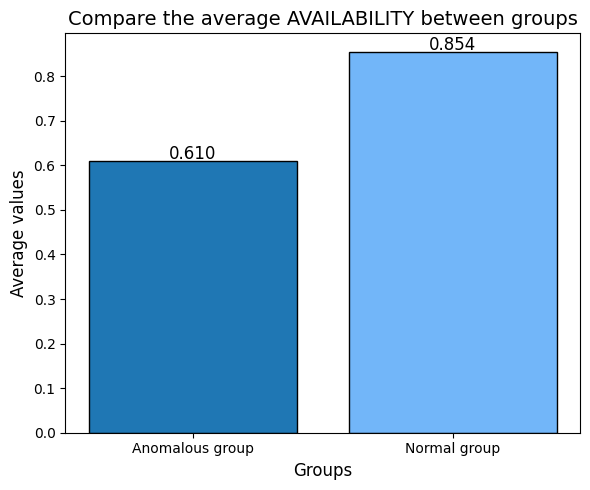

In [102]:
import matplotlib.pyplot as plt

# Tính trung bình AVAILABILITY của hai nhóm
mean_values = {
    'Anomalous group': suspect_data['AVAILABILITY'].mean(),
    'Normal group': normal_data['AVAILABILITY'].mean()
}

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 5))
plt.bar(mean_values.keys(), mean_values.values(), color=['#1f77b4', '#72b6f9'], edgecolor='black')

plt.title('Compare the average AVAILABILITY between groups', fontsize=14)
plt.ylabel('Average values', fontsize=12)
plt.xlabel('Groups', fontsize=12)

# Hiển thị giá trị trên cột
for i, v in enumerate(mean_values.values()):
    plt.text(i, v + 0.005, f'{v:.3f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [50]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(
    suspect_data['AVAILABILITY'],
    normal_data['AVAILABILITY'],
    equal_var=False
)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")

T-statistic: -32.903, p-value: 0.00000


p-value < 0.05, đồng nghĩa trong tập dữ liệu, hai nhóm ít có khả năng cùng phân phối, từ đó đưa ra nhận định rằng có sự khác biệt trong tỷ lệ AVAILABILITY giữa nhóm thông thường và nhóm nghi vấn, khẳng định rằng các máy ['MKZA1601', 'MKZA1502'] thực sự có AVAILABLITY thấp hơn các nhóm khác.  

In [53]:
cols = ['DOWNTIME', 'EFFECTIVE_RUNTIME', 'GOOD_PRODUCTION_QTY', 'REJECT_PRODUCTION_QTY']
group_data_4.groupby('LINE_NAME')[cols].mean().loc[suspects]

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,REJECT_PRODUCTION_QTY
LINE_NAME,,,,
MKZA1601,185.103734,232.430173,15622.614108,410.651452
MKZA1502,153.174757,257.336268,17273.255663,477.996764


In [55]:
group_data_4[cols].mean()

,0
DOWNTIME,64.355784
EFFECTIVE_RUNTIME,351.514108
GOOD_PRODUCTION_QTY,22701.731717
REJECT_PRODUCTION_QTY,369.848727


Dựa trên kết quả quan sát, có thể xác định dòng máy MKZA1601, MKZA1502 có trung bình thời gian dừng hoạt động bất thường cao hơn, thời gian hoạt động hiệu quả thấp hơn, lượng sản phẩm chất lượng cao thấp hơn, lượng sản phẩm bị từ chối cao hơn, chung quy phản ánh những bất thường có thể ảnh hưởng đến hiệu suất.

## OEE

In [56]:
Q1 = group_data_4['OEE'].quantile(0.25)
Q3 = group_data_4['OEE'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = group_data_4[(group_data_4['OEE'] < lower) | (group_data_4['OEE'] > upper)]
print(f"\n📊 {'OEE'}")
print(f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
print(f"  Lower: {lower:.2f}, upper: {upper:.2f}")
print(f"  Outliers: {len(outliers)} ({len(outliers)/len(group_data_4)*100:.2f}%)")


📊 OEE
  Q1 = 0.75, Q3 = 0.93, IQR = 0.18
  Lower: 0.49, upper: 1.19
  Outliers: 963 (4.92%)


In [57]:
anomalies = group_data_4[(group_data_4['OEE'] > 1)]
poor_overall = group_data_4[group_data_4['OEE'] < 0.49]


In [58]:
anomalies.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.0,81.0,81.0,81.000000,81.0,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5.888889,387.377540,9081.481481,0.0,0.0,0.0,354.975309,0.0,350.851852,232.444444,344.962963,4.123457,0.0,0.0,0.0,354.975309,0.0,33.801235,9313.925926,0.973864,0.986017,1.123060,1.076774
std,12.224974,144.970117,4859.889688,0.0,0.0,0.0,128.217489,0.0,129.787818,179.554309,127.009099,6.788562,0.0,0.0,0.0,128.217489,0.0,39.033449,4949.706223,0.018170,0.029001,0.103356,0.084150
min,0.000000,21.498772,4300.000000,0.0,0.0,0.0,21.000000,0.0,21.000000,18.000000,21.000000,0.000000,0.0,0.0,0.0,21.000000,0.0,20.000000,4358.000000,0.918849,0.864802,1.001901,1.000076
25%,0.000000,315.000000,7200.000000,0.0,0.0,0.0,278.000000,0.0,272.000000,86.000000,272.000000,0.000000,0.0,0.0,0.0,278.000000,0.0,20.000000,7301.000000,0.962036,0.985075,1.048951,1.018811
50%,0.000000,450.000000,9000.000000,0.0,0.0,0.0,430.000000,0.0,429.000000,205.000000,411.000000,1.000000,0.0,0.0,0.0,430.000000,0.0,20.000000,9137.000000,0.975940,1.000000,1.149425,1.042427
75%,7.000000,475.000000,9500.000000,0.0,0.0,0.0,443.000000,0.0,441.000000,360.000000,438.000000,2.000000,0.0,0.0,0.0,443.000000,0.0,40.000000,9868.000000,0.989696,1.000000,1.173913,1.126640
max,58.000000,695.652174,46100.000000,0.0,0.0,0.0,470.000000,0.0,469.000000,1122.000000,468.000000,20.000000,0.0,0.0,0.0,470.000000,0.0,333.500000,47222.000000,0.998255,1.000000,1.840350,1.644367


In [59]:
poor_overall.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,983.000000,983.000000,983.000000,983.0,983.0,983.0,983.000000,983.0,983.000000,983.000000,983.000000,983.000000,983.0,983.0,983.0,983.000000,983.0,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,198.551373,142.143022,9215.014242,0.0,0.0,0.0,361.456765,0.0,345.769074,387.890132,147.217701,13.490336,0.0,0.0,0.0,361.456765,0.0,73.407497,9602.904374,0.844965,0.489151,0.847495,0.342547
std,94.701424,73.813219,4762.179962,0.0,0.0,0.0,148.718655,0.0,154.858692,220.574149,75.319857,53.618738,0.0,0.0,0.0,148.718655,0.0,38.148634,4818.893131,0.310054,0.209759,0.321755,0.154367
min,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,1.000000,15.000000,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.0,20.000000,20.000000,0.000000,0.009804,0.000000,0.000000
25%,175.500000,91.044776,6175.000000,0.0,0.0,0.0,398.000000,0.0,329.000000,222.500000,93.000000,0.000000,0.0,0.0,0.0,398.000000,0.0,51.000000,6591.500000,0.931883,0.392205,0.926359,0.294617
50%,225.000000,174.418605,10000.000000,0.0,0.0,0.0,430.000000,0.0,427.000000,375.000000,178.000000,0.000000,0.0,0.0,0.0,430.000000,0.0,67.000000,10385.000000,0.959314,0.458333,0.981818,0.402571
75%,253.000000,200.000000,13175.000000,0.0,0.0,0.0,443.000000,0.0,439.000000,525.000000,204.000000,1.000000,0.0,0.0,0.0,443.000000,0.0,79.200000,13592.500000,0.973871,0.500562,0.990440,0.453818
max,448.000000,234.328358,19700.000000,0.0,0.0,0.0,476.000000,0.0,473.000000,3000.000000,287.000000,420.000000,0.0,0.0,0.0,476.000000,0.0,244.200000,20239.000000,0.996647,1.000000,1.056189,0.489983


In [99]:
poor_overall['OEE'].value_counts().sort_index().index

Index([                  0.0, 0.0001136065877499351, 0.0002490882358699367,
        0.002058135051664207,   0.01178518615788724,   0.01352960569541546,
         0.02739234022910246,   0.02891551847606799,   0.03200752433968158,
         0.03684151785714285,
       ...
           0.488788445471006,    0.4889875722986289,    0.4890003015801845,
           0.489187337340139,    0.4893733567402142,      0.48944998295819,
          0.4895356099105958,    0.4898067653016807,     0.489905722856072,
          0.4899828231951924],
      dtype='float64', name='OEE', length=868)

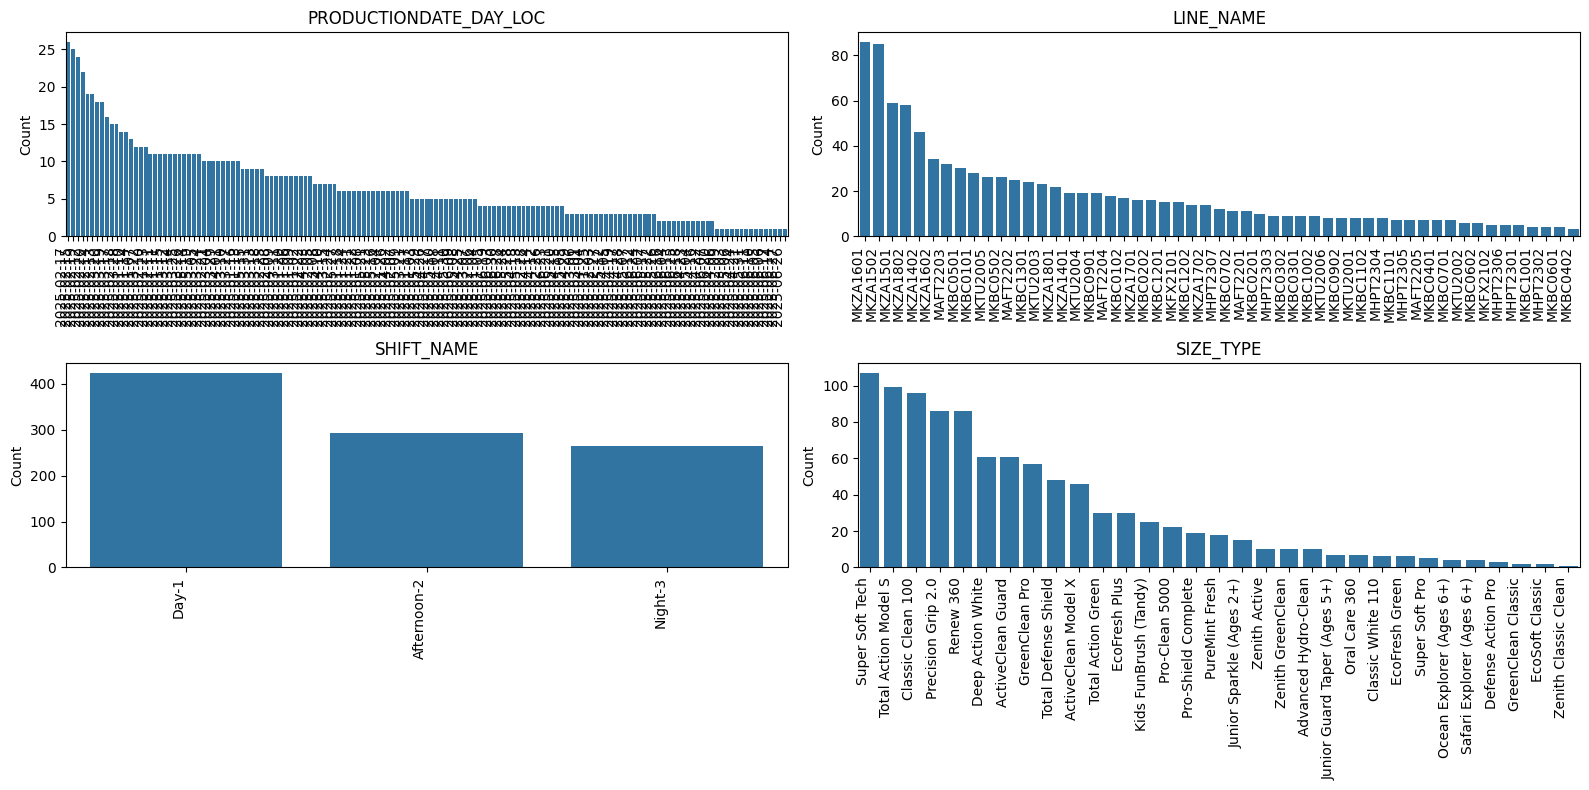

In [65]:
cat_cols = poor_overall.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=poor_overall, x=col, order=poor_overall[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Vấn đề xuất hiện tương tự: Ca sáng xuất hiện nhiều chỉ số OEE thấp hơn các ca khác, và vẫn 2 dòng máy MKZA1601 và MKZA1502 thường gặp một số vấn đề, điều này có thể do chỉ số AVAILABILITY và PERFORMANCE ở các ca này, hoặc máy này đã tương đối thấp, dẫn đến OEE cũng thấp, theo đó.

# Group data 3


In [66]:
group_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1854 to 48183
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     66 non-null     object 
 1   LINE_NAME                  66 non-null     object 
 2   SHIFT_NAME                 66 non-null     object 
 3   SIZE_TYPE                  66 non-null     object 
 4   DOWNTIME                   66 non-null     int64  
 5   EFFECTIVE_RUNTIME          66 non-null     float64
 6   GOOD_PRODUCTION_QTY        66 non-null     int64  
 7   LUNCH_AND_BREAK            66 non-null     int64  
 8   MEETING_AND_TRAINING       66 non-null     int64  
 9   NO_DEMAND                  66 non-null     int64  
 10  PLANT_AVAILABLE_TIME       66 non-null     int64  
 11  PLANT_EXPERIMENTATION      66 non-null     int64  
 12  PRODUCTION_AVAILABLE_TIME  66 non-null     int64  
 13  REJECT_PRODUCTION_QTY      66 non-null     int64  


Giá trị trống trong PERFORMANCE và QUALITY là do RUNTIME = 0, GOOD_PRODUCTION_QTY và REJECT_PRODUCTION_QTY = 0. Ta sẽ tiến hành phân tích các giá trị này



In [67]:
group_data_3.describe()

,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
count,66.000000,66.0,66.0,66.0,66.0,66.0,66.000000,66.0,66.000000,66.0,66.0,66.000000,66.0,66.0,66.0,66.000000,66.0,0.0,66.0,0.0,44.0,0.0,0.0
mean,202.954545,0.0,0.0,0.0,0.0,0.0,293.969697,0.0,202.954545,0.0,0.0,124.954545,0.0,0.0,0.0,293.969697,0.0,NaN,0.0,NaN,0.0,NaN,NaN
std,207.745364,0.0,0.0,0.0,0.0,0.0,173.072414,0.0,207.745364,0.0,0.0,182.661472,0.0,0.0,0.0,173.072414,0.0,NaN,0.0,NaN,0.0,NaN,NaN
min,0.000000,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,15.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
25%,0.000000,0.0,0.0,0.0,0.0,0.0,120.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,120.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
50%,100.000000,0.0,0.0,0.0,0.0,0.0,283.500000,0.0,100.000000,0.0,0.0,0.000000,0.0,0.0,0.0,283.500000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
75%,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,269.250000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN
max,480.000000,0.0,0.0,0.0,0.0,0.0,480.000000,0.0,480.000000,0.0,0.0,650.000000,0.0,0.0,0.0,480.000000,0.0,NaN,0.0,NaN,0.0,NaN,NaN


In [68]:
group_data_3 = group_data_3.drop(columns=['OEE','PERFORMANCE','QUALITY','PRODUCTION_ORDER_RATE'])

In [69]:
numeric_cols = group_data_3.select_dtypes(include=np.number)
non_zero_cols = numeric_cols.loc[:, (numeric_cols != 0).any(axis=0)]

non_numeric_cols = group_data_3.select_dtypes(exclude=np.number)
group_data_3 = pd.concat([non_numeric_cols, non_zero_cols], axis=1)


In [70]:
group_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 1854 to 48183
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     66 non-null     object 
 1   LINE_NAME                  66 non-null     object 
 2   SHIFT_NAME                 66 non-null     object 
 3   SIZE_TYPE                  66 non-null     object 
 4   DOWNTIME                   66 non-null     int64  
 5   PLANT_AVAILABLE_TIME       66 non-null     int64  
 6   PRODUCTION_AVAILABLE_TIME  66 non-null     int64  
 7   CHANGEOVER_DURATION        66 non-null     int64  
 8   TOTAL_TIME                 66 non-null     int64  
 9   AVAILABILITY               44 non-null     float64
dtypes: float64(1), int64(5), object(4)
memory usage: 5.7+ KB


In [72]:
group_data_3[group_data_3['AVAILABILITY'].isna()].describe()

,DOWNTIME,PLANT_AVAILABLE_TIME,PRODUCTION_AVAILABLE_TIME,CHANGEOVER_DURATION,TOTAL_TIME,AVAILABILITY
count,22.0,22.000000,22.0,22.0000,22.000000,0.0
mean,0.0,224.409091,0.0,308.5000,224.409091,NaN
std,0.0,163.682521,0.0,174.0894,163.682521,NaN
min,0.0,15.000000,0.0,15.0000,15.000000,NaN
25%,0.0,97.500000,0.0,217.5000,97.500000,NaN
50%,0.0,150.000000,0.0,300.0000,150.000000,NaN
75%,0.0,360.000000,0.0,412.5000,360.000000,NaN
max,0.0,480.000000,0.0,650.0000,480.000000,NaN


In [73]:
not_available = group_data_3[group_data_3['AVAILABILITY'].isna()]

## Group data 3 with no null

In [74]:
group_data_3 = group_data_3.dropna()

In [75]:
group_data_3.isna().sum()

,0
PRODUCTIONDATE_DAY_LOC,0
LINE_NAME,0
SHIFT_NAME,0
SIZE_TYPE,0
DOWNTIME,0
PLANT_AVAILABLE_TIME,0
PRODUCTION_AVAILABLE_TIME,0
CHANGEOVER_DURATION,0
TOTAL_TIME,0
AVAILABILITY,0


In [76]:
group_data_3.duplicated().sum()

np.int64(0)

In [77]:
group_data_3.describe()

,DOWNTIME,PLANT_AVAILABLE_TIME,PRODUCTION_AVAILABLE_TIME,CHANGEOVER_DURATION,TOTAL_TIME,AVAILABILITY
count,44.000000,44.00000,44.000000,44.000000,44.00000,44.0
mean,304.431818,328.75000,304.431818,33.181818,328.75000,0.0
std,183.378551,168.76475,183.378551,98.895593,168.76475,0.0
min,33.000000,60.00000,33.000000,0.000000,60.00000,0.0
25%,100.000000,160.00000,100.000000,0.000000,160.00000,0.0
50%,387.000000,472.00000,387.000000,0.000000,472.00000,0.0
75%,480.000000,480.00000,480.000000,0.000000,480.00000,0.0
max,480.000000,480.00000,480.000000,390.000000,480.00000,0.0


Như vậy đây là những ghi nhận mặc dù đối tượng được lên lịch hoạt động nhưng không thực sự hoạt động.

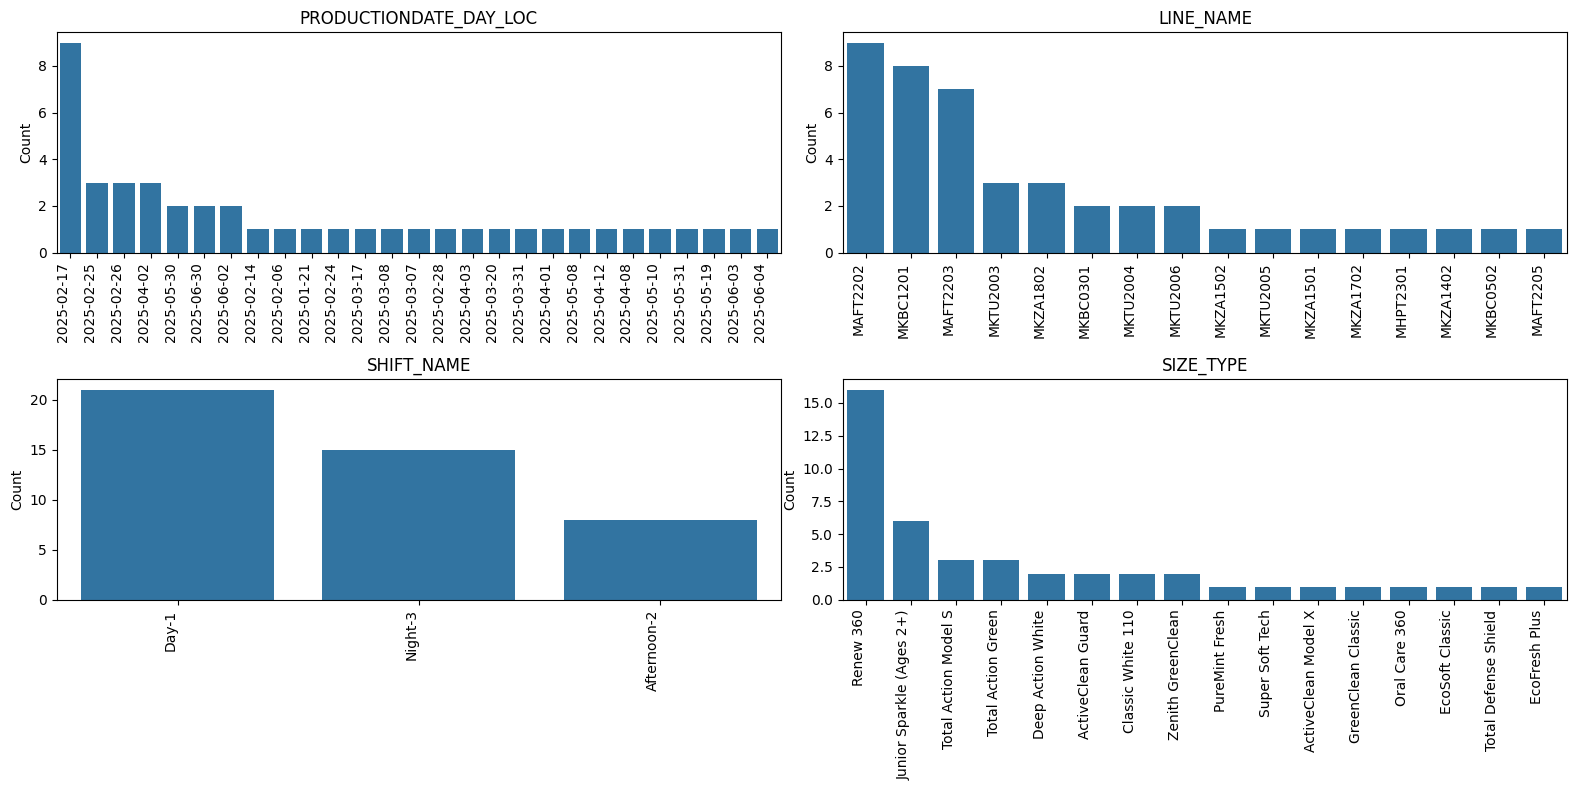

In [78]:
cat_cols = group_data_3.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=group_data_3, x=col, order=group_data_3[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [79]:
suspect_days = ['2025-02-17']
suspect_lines = ['MAFT2202','MKBC1201','MAFT2203']
suspect_shift = ['Day-1']
suspect_types = ['Renew 360']

In [80]:
group_data_3[group_data_3['PRODUCTIONDATE_DAY_LOC'].isin(suspect_days)]

,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,PLANT_AVAILABLE_TIME,PRODUCTION_AVAILABLE_TIME,CHANGEOVER_DURATION,TOTAL_TIME,AVAILABILITY
12126,2025-02-17,MAFT2202,Day-1,Renew 360,480,480,480,0,480,0.0
12127,2025-02-17,MAFT2202,Night-3,Renew 360,100,100,100,0,100,0.0
12353,2025-02-17,MKTU2003,Night-3,PureMint Fresh,100,100,100,0,100,0.0
12359,2025-02-17,MKTU2004,Night-3,Total Action Green,480,480,480,0,480,0.0
12364,2025-02-17,MKTU2005,Night-3,Zenith GreenClean,100,100,100,0,100,0.0
12370,2025-02-17,MKTU2006,Night-3,Total Action Green,100,100,100,0,100,0.0
12392,2025-02-17,MKZA1502,Night-3,ActiveClean Guard,100,100,100,0,100,0.0
12416,2025-02-17,MKZA1702,Night-3,Deep Action White,100,100,100,0,100,0.0
12427,2025-02-17,MKZA1802,Night-3,Total Action Model S,100,100,100,0,100,0.0


In [92]:
suspect = group_data_4[group_data_4['PRODUCTIONDATE_DAY_LOC'].isin(suspect_days)]

print(f"Số bản ghi nghi ngờ: {len(suspect)}")
display(suspect.head())


Số bản ghi nghi ngờ: 143


,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
12119,2025-02-17,MAFT2201,Afternoon-2,Renew 360,149,266.0,6384,0,0,0,432,0,432,351,283,0,0,0,0,432,0,24.0,6735,0.947884,0.655093,0.939929,0.583651
12121,2025-02-17,MAFT2201,Day-1,Renew 360,160,214.0,5136,0,0,0,418,0,388,583,228,30,0,0,0,418,0,24.0,5719,0.898059,0.587629,0.938596,0.495321
12123,2025-02-17,MAFT2201,Night-3,Renew 360,204,224.0,5376,0,0,0,445,0,445,496,241,0,0,0,0,445,0,24.0,5872,0.915531,0.541573,0.929461,0.460852
12129,2025-02-17,MAFT2203,Afternoon-2,Renew 360,180,216.0,5184,0,0,0,417,0,417,522,237,0,0,0,0,417,0,24.0,5706,0.908517,0.568345,0.911392,0.470599
12131,2025-02-17,MAFT2203,Day-1,Renew 360,108,68.0,4932,0,0,0,186,0,186,221,78,0,0,0,0,186,0,24.0,5153,0.957112,0.419355,0.871795,0.349912


In [93]:
suspect = group_data_4[group_data_4['LINE_NAME'].isin(suspect_lines)]

print(f"Số bản ghi nghi ngờ: {len(suspect)}")
display(suspect.head())


Số bản ghi nghi ngờ: 651


,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,EFFECTIVE_RUNTIME,GOOD_PRODUCTION_QTY,LUNCH_AND_BREAK,MEETING_AND_TRAINING,NO_DEMAND,PLANT_AVAILABLE_TIME,PLANT_EXPERIMENTATION,PRODUCTION_AVAILABLE_TIME,REJECT_PRODUCTION_QTY,RUN_TIME,CHANGEOVER_DURATION,CLEANING_AND_SANITIZATION,BUSINESS_EXTERNAL_TIME,PLANNED_MAINTENANCE,TOTAL_TIME,WAITING_TIME,PRODUCTION_ORDER_RATE,TOTAL_OUTPUT,QUALITY,AVAILABILITY,PERFORMANCE,OEE
165,2025-01-02,MAFT2202,Afternoon-2,Renew 360,100,316.00,7584,0,0,0,432,0,432,135,332,0,0,0,0,432,0,24.0,7719,0.982511,0.768519,0.951807,0.718688
167,2025-01-02,MAFT2202,Day-1,Renew 360,74,283.75,6810,0,0,0,418,0,388,653,314,30,0,0,0,418,0,48.0,7463,0.912502,0.809278,0.903662,0.667326
169,2025-01-02,MAFT2202,Night-3,Renew 360,52,324.00,7776,0,0,0,395,0,395,500,343,0,0,0,0,395,0,24.0,8276,0.939584,0.868354,0.944606,0.770697
171,2025-01-02,MAFT2203,Afternoon-2,Renew 360,192,224.00,5376,0,0,0,428,0,428,349,236,0,0,0,0,428,0,24.0,5725,0.939039,0.551402,0.949153,0.491460
173,2025-01-02,MAFT2203,Day-1,Renew 360,93,300.00,7200,0,0,0,418,0,418,537,325,0,0,0,0,418,0,24.0,7737,0.930593,0.777512,0.923077,0.667890


## Not available

In [94]:
not_available.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1854 to 36466
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PRODUCTIONDATE_DAY_LOC     22 non-null     object 
 1   LINE_NAME                  22 non-null     object 
 2   SHIFT_NAME                 22 non-null     object 
 3   SIZE_TYPE                  22 non-null     object 
 4   DOWNTIME                   22 non-null     int64  
 5   PLANT_AVAILABLE_TIME       22 non-null     int64  
 6   PRODUCTION_AVAILABLE_TIME  22 non-null     int64  
 7   CHANGEOVER_DURATION        22 non-null     int64  
 8   TOTAL_TIME                 22 non-null     int64  
 9   AVAILABILITY               0 non-null      float64
dtypes: float64(1), int64(5), object(4)
memory usage: 1.9+ KB


In [96]:
not_available.drop(columns = 'AVAILABILITY').head()

,PRODUCTIONDATE_DAY_LOC,LINE_NAME,SHIFT_NAME,SIZE_TYPE,DOWNTIME,PLANT_AVAILABLE_TIME,PRODUCTION_AVAILABLE_TIME,CHANGEOVER_DURATION,TOTAL_TIME
1854,2025-01-07,MKTU2005,Day-1,Zenith GreenClean,0,90,0,270,90
3904,2025-01-14,MKZA1701,Day-1,Classic Clean 100,0,360,0,420,360
4126,2025-01-15,MKBC1301,Day-1,GreenClean Pro,0,120,0,300,120
6105,2025-01-22,MKTU2003,Day-1,PureMint Fresh,0,300,0,300,300
10203,2025-02-10,MKBC0102,Day-1,Pro-Clean 5000,0,60,0,60,60


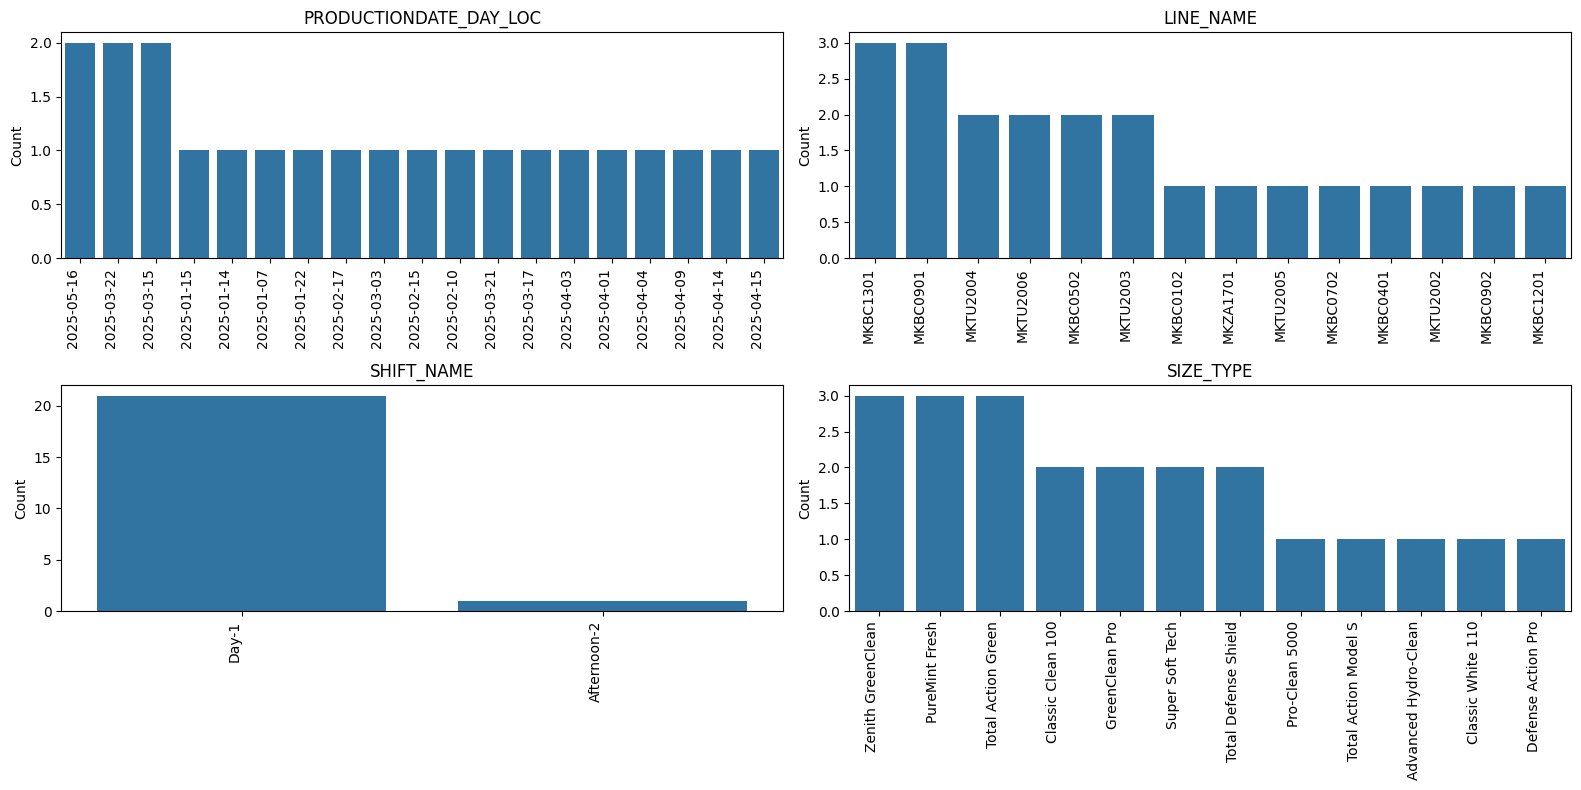

In [97]:
cat_cols = not_available.select_dtypes(include=['object', 'string']).columns

# Xác định layout phù hợp dựa trên số cột
n_cols = 2
n_rows = (len(cat_cols) + 1) // n_cols

plt.figure(figsize=(16, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=not_available, x=col, order=not_available[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=90, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Đa phần các đối tượng chưa được sẵn sàng để hoạt động có ca làm việc là ca sáng (do không có nhân viện hoạt động)